<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [12]:
def sum_prod(X, V):
    '''
    X - матрицы (n, n)
    V - векторы (n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros_like(X[0])  # Начальная матрица для суммирования

    for i in range(len(X)):
        result += np.dot(X[i], V[i])  # Умножаем матрицу на вектор и добавляем к сумме

    return result

def test_sum_prod():
    X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
    V = [np.array([[1], [1]]), np.array([[1], [1]])]

    result = sum_prod(X, V)
    expected = np.array([[14, 14], [22, 22]])

    assert np.allclose(result, expected), f"Test failed! Expected {expected}, got {result}"

    print("Test passed!")

test_sum_prod()

Test passed!


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [13]:
def binarize(M, threshold=0.5):
    return np.where(M > threshold, 1, 0)

def test_binarize():
    M = np.array([[0.2, 0.7], [0.8, 0.3]])

    result = binarize(M, 0.5)
    expected = np.array([[0, 1], [1, 0]])

    assert np.array_equal(result, expected), f"Test failed! Expected {expected}, got {result}"

    print("Test passed!")

test_binarize()

Test passed!


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [25]:
def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(mat[:, i]) for i in range(mat.shape[1])]

def test_unique_functions():
    mat = np.array([[1, 2, 2],
                    [3, 4, 4],
                    [1, 5, 5]])

    result_rows = unique_rows(mat)
    expected_rows = [np.array([1, 2]), np.array([3, 4]), np.array([1, 5])]

    assert all(np.array_equal(result, expected) for result, expected in zip(result_rows, expected_rows)), "Test for unique_rows failed"

    result_columns = unique_columns(mat)
    expected_columns = [np.array([1, 3]), np.array([2, 4, 5]), np.array([2, 4, 5])]

    assert all(np.array_equal(result, expected) for result, expected in zip(result_columns, expected_columns)), "Test for unique_columns failed"

    print("All tests passed!")

test_unique_functions()


All tests passed!


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

Математическое ожидание для каждого столбца: [-0.330295   -0.13192666  0.46568364  0.96202007 -0.05970482]
Дисперсия для каждого столбца: [0.35868661 3.49333675 1.16734391 0.8027774  1.20222431]
Математическое ожидание для каждой строки: [ 1.17775468  0.37171521 -1.0488186   0.22397049]
Дисперсия для каждой строки: [1.48568784 0.59616261 1.17984712 0.70026248]


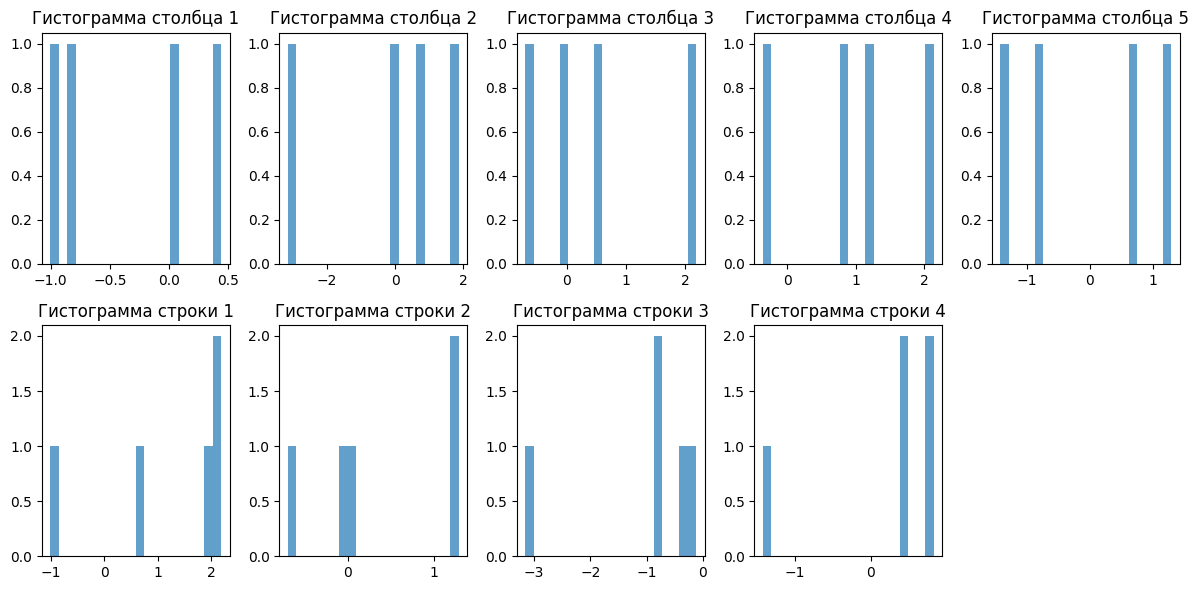

In [23]:
def fill_matrix_and_plot(m, n):
    matrix = np.random.normal(loc=0, scale=1, size=(m, n))

    column_means = np.mean(matrix, axis=0)
    column_variances = np.var(matrix, axis=0)

    row_means = np.mean(matrix, axis=1)
    row_variances = np.var(matrix, axis=1)

    print("Математическое ожидание для каждого столбца:", column_means)
    print("Дисперсия для каждого столбца:", column_variances)

    print("Математическое ожидание для каждой строки:", row_means)
    print("Дисперсия для каждой строки:", row_variances)

    plt.figure(figsize=(12, 6))
    for i in range(n):
        plt.subplot(2, n, i + 1)
        plt.hist(matrix[:, i], bins=20, alpha=0.7)
        plt.title(f'Гистограмма столбца {i+1}')

    for i in range(m):
        plt.subplot(2, n, n + i + 1)
        plt.hist(matrix[i, :], bins=20, alpha=0.7)
        plt.title(f'Гистограмма строки {i+1}')
    plt.tight_layout()
    plt.show()

fill_matrix_and_plot(4, 5)

<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [26]:
def chess(m, n, a, b):
    mat = np.zeros((m, n), dtype=int)

    for i in range(m):
        for j in range(n):
            if (i + j) % 2 == 0:
                mat[i, j] = a
            else:
                mat[i, j] = b

    return mat

def test_chess():
    mat1 = chess(4, 4, 1, 2)
    expected1 = np.array([[1, 2, 1, 2],
                          [2, 1, 2, 1],
                          [1, 2, 1, 2],
                          [2, 1, 2, 1]])
    assert np.array_equal(mat1, expected1), "Test 1 failed"

    mat2 = chess(3, 3, 5, 8)
    expected2 = np.array([[5, 8, 5],
                          [8, 5, 8],
                          [5, 8, 5]])
    assert np.array_equal(mat2, expected2), "Test 2 failed"

    mat3 = chess(2, 5, 7, 9)
    expected3 = np.array([[7, 9, 7, 9, 7],
                          [9, 7, 9, 7, 9]])
    assert np.array_equal(mat3, expected3), "Test 3 failed"

    print("All tests passed!")

test_chess()


All tests passed!


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

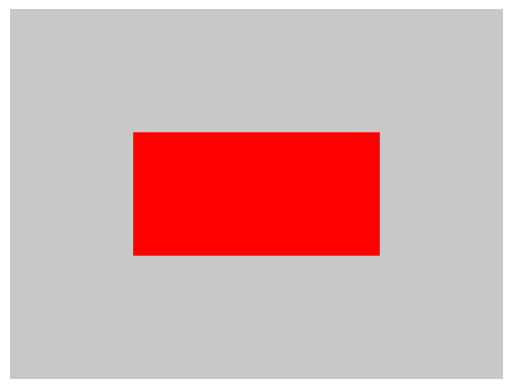

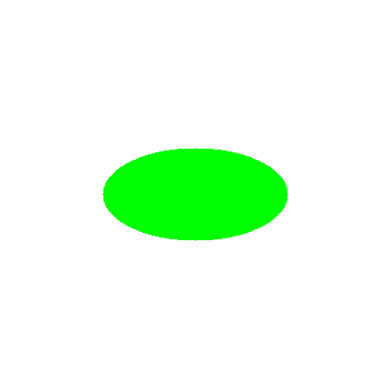

In [27]:
def draw_rectangle(a, b, m, n, rectangle_color, background_color):
    img = np.full((m, n, 3), background_color, dtype=np.uint8)

    start_x = (n - a) // 2
    start_y = (m - b) // 2
    end_x = start_x + a
    end_y = start_y + b

    img[start_y:end_y, start_x:end_x] = rectangle_color

    plt.imshow(img)
    plt.axis('off')
    plt.show()

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    img = np.full((m, n, 3), background_color, dtype=np.uint8)

    x0, y0 = n // 2, m // 2

    y, x = np.ogrid[:m, :n]
    mask = ((x - x0)**2 / a**2 + (y - y0)**2 / b**2) <= 1

    img[mask] = ellipse_color

    plt.imshow(img)
    plt.axis('off')
    plt.show()

def test_shapes():
    draw_rectangle(200, 100, 300, 400, (255, 0, 0), (200, 200, 200))  # Красный прямоугольник

    draw_ellipse(100, 50, 400, 400, (0, 255, 0), (255, 255, 255))  # Зеленый эллипс

test_shapes()

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

Математическое ожидание: -0.10384651739409384
Дисперсия: 0.8165221946938584
Стандартное отклонение (СКО): 0.9036161766446296
Локальные максимумы: [ 3  6  9 12 15 17 20 22 25 27 29 31 34 36 40 47 50 54 59 61 65 67 71 73
 75 78 82 86 89 91 93 96]
Локальные минимумы: [ 1  4  8 11 13 16 19 21 23 26 28 30 33 35 37 44 49 52 56 60 63 66 69 72
 74 77 79 84 88 90 92 95]


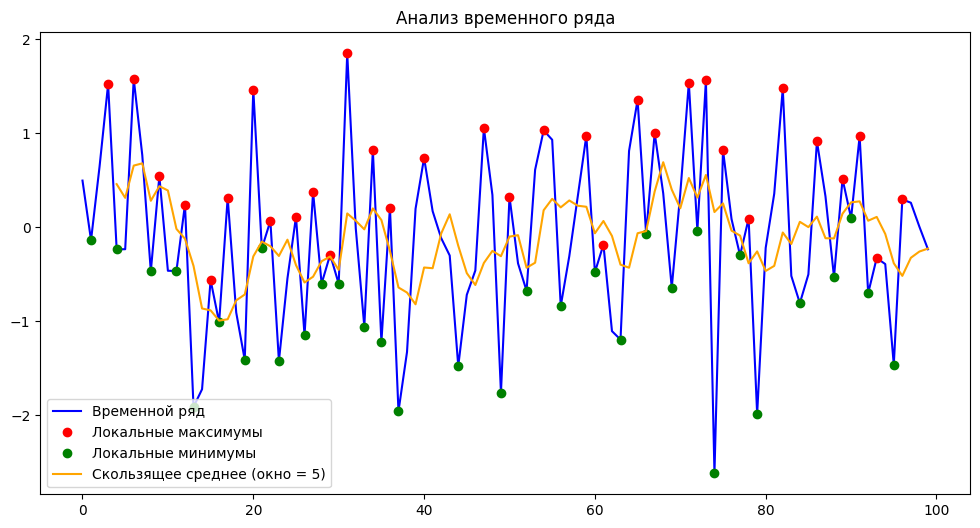

In [30]:
from scipy.signal import argrelextrema

def analyze_time_series(series, p):
    # Математическое ожидание (среднее значение)
    mean = np.mean(series)

    #Дисперсия
    variance = np.var(series)

    # СКО
    std_deviation = np.std(series)

    # Локальные максимумы
    local_maxima = argrelextrema(series, np.greater)[0]

    # Локальные минимумы
    local_minima = argrelextrema(series, np.less)[0]

    # Скользящее среднее
    moving_average = np.convolve(series, np.ones(p)/p, mode='valid')

    print("Математическое ожидание:", mean)
    print("Дисперсия:", variance)
    print("Стандартное отклонение (СКО):", std_deviation)

    print("Локальные максимумы:", local_maxima)
    print("Локальные минимумы:", local_minima)

    plt.figure(figsize=(12, 6))
    plt.plot(series, label='Временной ряд', color='blue')
    plt.plot(local_maxima, series[local_maxima], 'ro', label='Локальные максимумы')
    plt.plot(local_minima, series[local_minima], 'go', label='Локальные минимумы')
    plt.plot(np.arange(p-1, len(series)), moving_average, label=f'Скользящее среднее (окно = {p})', color='orange')
    plt.title("Анализ временного ряда")
    plt.legend()
    plt.show()

np.random.seed(42)
series = np.random.randn(100)
p = 5
analyze_time_series(series, p)

<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [33]:
def one_hot_encoding(labels):
    num_classes = np.max(labels) + 1
    one_hot_matrix = np.zeros((len(labels), num_classes), dtype=int)

    for i, label in enumerate(labels):
        one_hot_matrix[i, label] = 1
    return one_hot_matrix

labels = [0, 2, 3, 0]
one_hot_encoded = one_hot_encoding(labels)
print(one_hot_encoded)

[[1 0 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [1 0 0 0]]
